In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

### Question 1
Fit a periodic function to the min and max temps for each month of the year. Use matplotlib to visualize the results.

In [3]:
# X and Y values
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
months = np.arange(1,13)

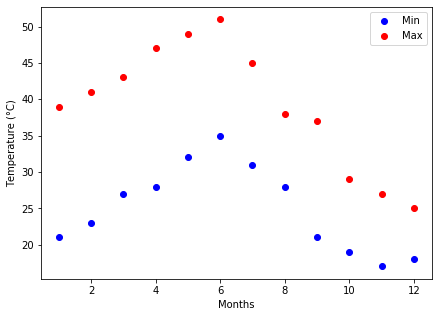

In [4]:
#Look at data shape to get an idea of what type of model will work
plt.figure(figsize=(7,5))

plt.plot(months, min_temp, 'o', c="blue", label="Min")
plt.plot(months, max_temp, 'o', c="red", label="Max")

plt.xlabel("Months")
plt.ylabel("Temperature (°C)")
plt.legend(loc="best")
plt.show()

In [6]:
#try basic sin function with 4 parameters
def model_basic (x, a, b, c, d):
    return a * np.sin(x * b + c) + d

#Find params using scipy's curve-fit
min_params, _ = curve_fit(model_basic, months, min_temp)
max_params, _ = curve_fit(model_basic, months, max_temp)

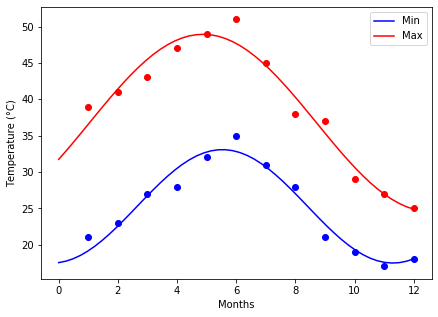

In [8]:
#plot the basic period function
x_smooth = np.linspace(0,12)

plt.figure(figsize=(7,5))

plt.plot(months, min_temp, 'o', c="blue")
plt.plot(months, max_temp, 'o', c="red")#

plt.plot(x_smooth, model_basic(x_smooth, *min_params), c="blue", label="Min")
plt.plot(x_smooth, model_basic(x_smooth, *max_params), c="red", label="Max")

plt.xlabel("Months")
plt.ylabel("Temperature (°C)")
plt.legend(loc="best")
plt.show()

### Question 2
Using the titanic data, plot:
1. a pie chart presenting the male/female proportion
2. a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [12]:
#Read data and idea of what it looks like
url = r"https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
print(f"Titanic shape {titanic.shape}")
titanic.head(3)

Titanic shape (1310, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 2.1 Pie Chart of sex

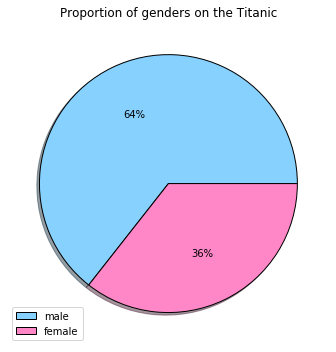

In [13]:
# get counts of each sex and plot
sex_count = titanic.sex.value_counts()

colours = ["#87d1ff","#ff87c7"] #male: blue, female: pink

plt.figure(figsize=(5,5))

plt.pie(sex_count, colors=colours, autopct='%1.0f%%', shadow=True, wedgeprops={'edgecolor':'black'})

plt.title("Proportion of genders on the Titanic")
plt.legend(sex_count.keys(),loc="lower left")
plt.tight_layout()
plt.show()

#### 2.2 Scatter plot of Fare vs Age

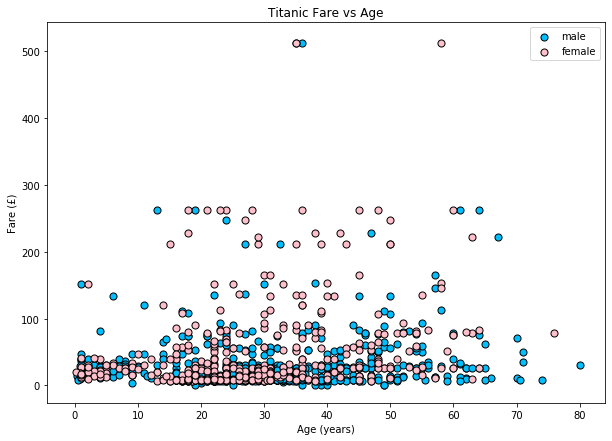

In [14]:
data = titanic[["age","fare","sex"]].dropna()

colours = {"male": "deepskyblue", "female": "pink"}
#data["colour"] = data.sex.apply(lambda x: colours[x])


plt.figure(figsize=(10,7))
for lab, color in colours.items():
    plt.scatter(x="age", y="fare", data=data[data.sex==lab], label=lab, c=color,edgecolors="black", s=50)

plt.legend()
plt.xlabel("Age (years)")
plt.ylabel("Fare (£)")
plt.title("Titanic Fare vs Age")
plt.show()

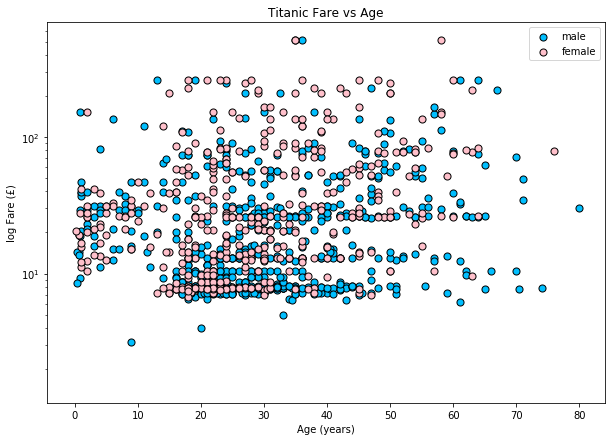

In [15]:
# just out of interest..lets plot log fare 
plt.figure(figsize=(10,7))
for lab, color in colours.items():
    plt.scatter(x="age", y="fare", data=data[data.sex==lab], label=lab, c=color,edgecolors="black", s=50)

plt.yscale("log")
    
plt.legend()
plt.xlabel("Age (years)")
plt.ylabel("log Fare (£)")
plt.title("Titanic Fare vs Age")
plt.show()